In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
# Hyperparameters
C = 10 # regularization strength
T = 600000 # max_epochs

In [3]:
def train(X, y):
    eta = 0.0001 # Learning rate
    w = np.zeros(X.shape[1]) # Weight vector
    b = 0 # Bias

    # For each epoch
    for t in range(1, T+1):
        # Get a random index from features
        i = np.random.choice(X_train.shape[0])
        # Get the corresponding random feature and label
        X_i, y_i = X[i], y[i]

        # Compute hinge loss
        v = 1 - (y_i * (np.dot(X_i, w) + b))

        # Compute the partial gradients
        if v <= 0:
            dw = w
            db = 0
        else:
            dw = w - C * y_i * X_i
            db = -C * y_i

        # Update the weight vector and bias
        w = w - eta * dw
        b = b - eta * db
        
        if t % (T/10) == 0:
            print('#Epoch: {}/{}'.format(t, T))

    # Return the weight vector of the final epoch
    return w, b

In [4]:
def decision_function(w, b, X):
    # Compute the output of the svm weight vector
    return np.dot(X, w) + b

In [5]:
def draw(w, b, X, y):
    # Plot the features
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Accent)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = decision_function(w, b, xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    ax.scatter(X[[11, 67], 0], X[[11, 67], 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

In [6]:
def test(w, b, X, y):
    # Compute the number of misclassified points
    error = np.sum(np.where(y != np.sign(decision_function(w, b, X)), 1, 0))
    print('Total number of test data points: {}'.format(len(X)))
    print('Number of misclassified points: {}'.format(error))

In [7]:
# Generate sample data
features, labels = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=10)

# Change labels from (0,1) -> (-1,1)
labels = np.where(labels == 1, 1, -1)

# Train Test Split
X_train, X_test, y_train, y_test = features[:80], features[-20:], labels[:80], labels[-20:]

In [8]:
weights, bias = train(X_train, y_train)

#Epoch: 60000/600000
#Epoch: 120000/600000
#Epoch: 180000/600000
#Epoch: 240000/600000
#Epoch: 300000/600000
#Epoch: 360000/600000
#Epoch: 420000/600000
#Epoch: 480000/600000
#Epoch: 540000/600000
#Epoch: 600000/600000


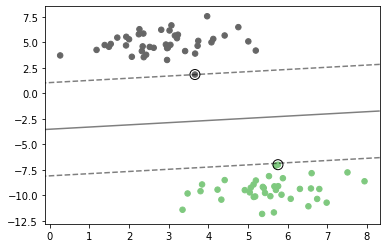

In [9]:
draw(weights, bias, X_train, y_train)

In [10]:
test(weights, bias, X_test, y_test)

Total number of test data points: 20
Number of misclassified points: 0
